In [9]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [10]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/BPIC20/deviation_predictions.pkl"

# Evaluation deviation labels

In [11]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [12]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.08242377586343339
Precision macro dev per label:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.2907608695652174, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.5, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.0, ('>>', 'Request Payment'): 0.00078003120124805, ('Declaration APPROVED by PRE_APPROVER', '>>'): 0.0624, ('Declaration FINAL_APPROVED by SUPERVISOR', '>>'): 0.0, ('Declaration REJECTED by EMPLOYEE', '>>'): 0.11871227364185111, ('Declaration REJECTED by MISSING', '>>'): 0.00847457627118644, ('Declaration REJECTED by PRE_APPROVER', '>>'): 0.0, ('Declaration SUBMITTED by EMPLOYEE', '>>'): 0.007957559681697613, ('Payment Handled', '>>'): 0.0, ('Request Payment', '>>'): 0.0}
Recall macro dev:  0.42396866997271737
Recall macro dev per label:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.6257309941520468, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.1111111111111111, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.0, ('>>', 'Request Pay

In [13]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.9973844801220707
Precision macro per label no dev:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.9806842363725651, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.9988309221101855, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.9991220368744512, ('>>', 'Request Payment'): 1.0, ('Declaration APPROVED by PRE_APPROVER', '>>'): 0.9973190348525469, ('Declaration FINAL_APPROVED by SUPERVISOR', '>>'): 0.9983773417908246, ('Declaration REJECTED by EMPLOYEE', '>>'): 0.9964512514008218, ('Declaration REJECTED by MISSING', '>>'): 0.9994916115912558, ('Declaration REJECTED by PRE_APPROVER', '>>'): 0.9986351228389445, ('Declaration SUBMITTED by EMPLOYEE', '>>'): 1.0, ('Payment Handled', '>>'): 0.9998511683286203, ('Request Payment', '>>'): 0.9998510353046328}
Recall macro no dev:  0.9099793971925129
Recall macro per label no dev:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.919852602487333, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.9998537156

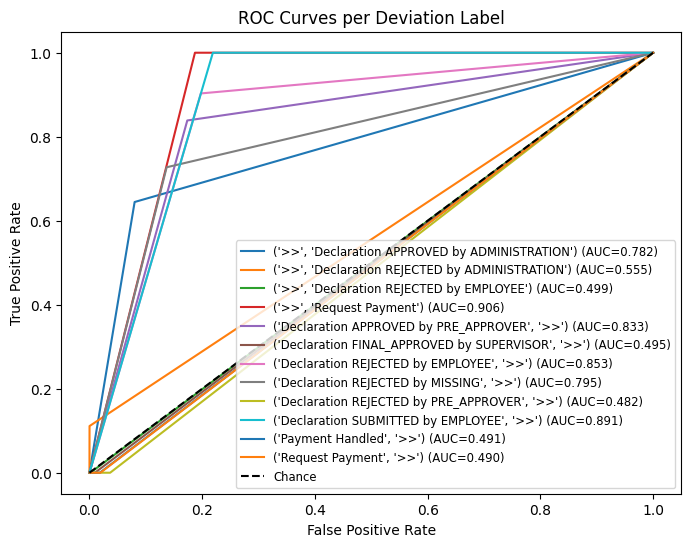

ROC_AUC macro dev per label:  {'per_label_auc': [0.7822154578701725, 0.5554824133671413, 0.4991957888580202, 0.9064143775569843, 0.8325657391836112, 0.495171202809482, 0.8527187608386714, 0.795155239843563, 0.4816413107080164, 0.8905312454266061, 0.4907948568088837, 0.49035651665692576], 'macro_auc': 0.6726869091606731}


In [14]:
roc_auc = eval.plot_macro_roc_auc()
print("ROC_AUC macro dev per label: ",roc_auc)

# Evaluation sequences

In [21]:
# Evaluation of the 

tgt_suff_dev_pos, pred_suff_dev_pos, real_tgt_suffixes, real_pred_suffix_samples = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_suff_dev_poss=tgt_suff_dev_pos, pred_suff_dev_poss=pred_suff_dev_pos)

print("likelihood at correct position in suffix for all deviations: ", per_label_mean)
print("mean likelihood of deviations' correct poistion across all deviations: ", weighted_macro)

print("min:", min(list(per_label_mean.values())))
print("max:", max(list(per_label_mean.values())))

likelihood at correct position in suffix for all deviations:  {'Declaration APPROVED by ADMINISTRATION': 0.5872590361445784, 'Declaration APPROVED by PRE_APPROVER': 0.6988297872340425, 'Declaration FINAL_APPROVED by SUPERVISOR': 0.05176470588235294, 'Declaration REJECTED by ADMINISTRATION': 0.11, 'Declaration REJECTED by EMPLOYEE': 0.320759493670886, 'Declaration REJECTED by MISSING': 0.0018181818181818182, 'Declaration REJECTED by PRE_APPROVER': 0.0, 'Declaration SUBMITTED by EMPLOYEE': 0.02, 'Payment Handled': 0.0, 'Request Payment': 0.265}
mean likelihood of deviations' correct poistion across all deviations:  0.46623626373626376
min: 0.0
max: 0.6988297872340425


/home/PSPLab/ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/src/notebooks/evaluation/../../evaluation/deviations_evalaution_metrics.py:646: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


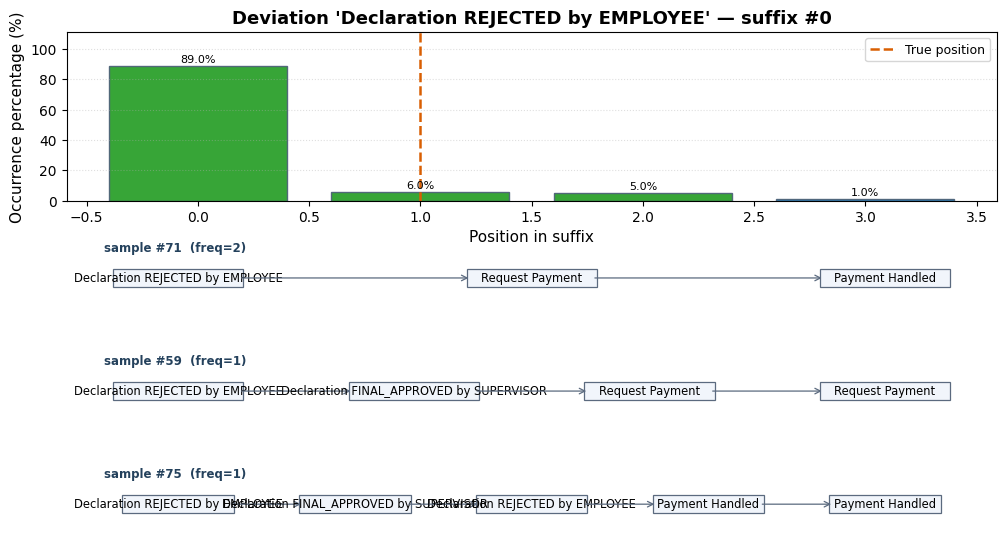

Samples placing 'Declaration REJECTED by EMPLOYEE' at position 0: [59, 71, 75, 81, 82, 96]


In [16]:
eval.plot_suffix_deviation_distribution(suffix_index=0,
                                        label='Declaration REJECTED by EMPLOYEE',
                                        tgt_suff_dev_poss=tgt_suff_dev_pos,
                                        pred_suff_dev_poss=pred_suff_dev_pos,
                                        pred_suffix_samples=real_pred_suffix_samples)